# Project on  Income Census

We focus on factors that increases one's earning above 50k(Income) . These factors can be age, workclass, educational level, martial status, occupation, race, sex and many more.

We shall proceed as follow:

- Import necessary Library (Pandas, Numpy, Matplotlib and seaborn)
- Data Overview
- Exploratory Data Analysis

## 1) Importing Library and income file

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

income = pd.read_csv("income_census.csv", na_values = '?') ## replacing any '?'sign in data to NaN
income

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


## 2)  Data Overview

### 2.1) Overall statistical view for numerical input

In [11]:
income.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### 2.2) Overview of unique count of  elements in column

In [12]:
income.nunique()

age                  73
workclass             8
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           14
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       41
income                2
dtype: int64

### 2.3) Viewing first 10 data entries

In [13]:
income.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,>50K


## 3) Exploratory Data Analysis

### 3.1) Which parameters contain missing values

<AxesSubplot:>

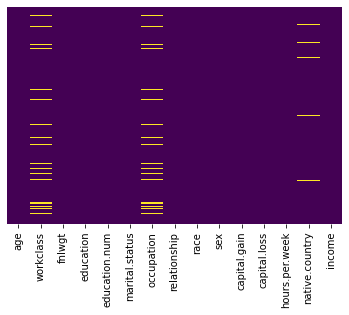

In [17]:
sns.heatmap(income.isnull(),yticklabels =False, cbar = False, cmap ='viridis') # show vertical broken lines when missing values exists.

We notice that workclass, occupation and native.country contain missing values. These are  non-numerical values and will affect not much in our analysis.

We shall therefore ignore these three factors.

### 3.2) Income (Dependent Variable)

<AxesSubplot:xlabel='income', ylabel='count'>

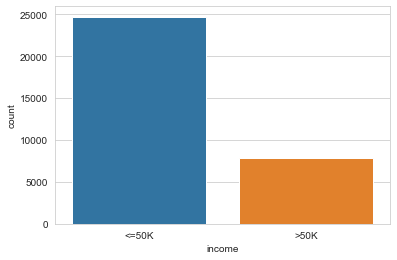

In [28]:
sns.set_style('whitegrid')
sns.countplot(x = 'income', data = income) # Looking how income is spread against our 2 earning category

In [30]:
#Counting the number of those earning above and below 50k as spell out by the graph above
income.groupby('income').size()

income
<=50K    24720
>50K      7841
dtype: int64

In [32]:
# Propotion of the number of people earning above and below 50k
income.groupby('income')['age'].count()/len(income)

income
<=50K    0.75919
>50K     0.24081
Name: age, dtype: float64

We conclude that above 50k constitute about 24%, while below 50k blocks 75%.

## 3.3) Other Parameters

### 3.3.1) Age

In [33]:
income.age.describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age'>

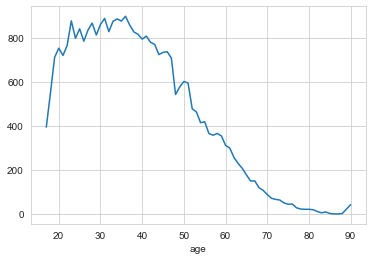

In [36]:
income.groupby('age').size().plot() # Showing age distribution and their counts

<AxesSubplot:xlabel='age', ylabel='count'>

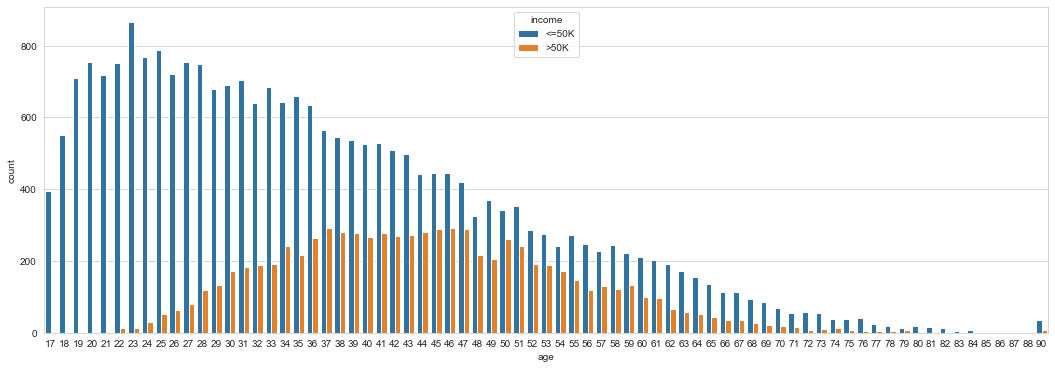

In [40]:
plt.figure(figsize = (18,6))
sns.countplot(x = 'age' ,  hue = 'income', data = income)# depict how earnings either above 50k or below 50k varies with age

In [42]:
g = income.groupby(['age','income']).size()
g                                               # Showing numerical values to the above graph

age  income
17   <=50K     395
18   <=50K     550
19   <=50K     710
     >50K        2
20   <=50K     753
              ... 
86   <=50K       1
87   <=50K       1
88   <=50K       3
90   <=50K      35
     >50K        8
Length: 138, dtype: int64

We observe that at ages 37,45,46 and 47, one have a high chance of earning an income > 50k

### 3.3.2) Hours per week

<AxesSubplot:xlabel='hours.per.week'>

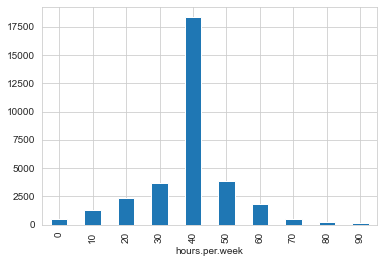

In [43]:
income.groupby(income['hours.per.week']//10*10)['income'].size().plot(kind = 'bar') # Grouping hours to the nearest tens and doing a count

We observe that the mode is 40hours per weeek and almost symetrically divived the data into two. Therefore we can redefine it below 40 and above 40.

In [44]:
income['hours.per.week2'] = np.where(income['hours.per.week']<40,'below 40','above 40')
income['hours.per.week2']

0        above 40
1        below 40
2        above 40
3        above 40
4        above 40
           ...   
32556    above 40
32557    below 40
32558    above 40
32559    above 40
32560    below 40
Name: hours.per.week2, Length: 32561, dtype: object

<AxesSubplot:xlabel='hours.per.week2', ylabel='count'>

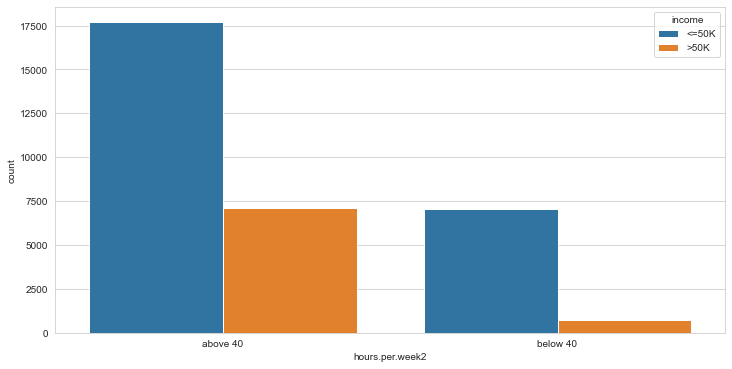

In [46]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'hours.per.week2' ,  hue = 'income', data = income) # plot of hours per week against income category.

We can conclude that people working above 40hours per week have a higher chance of earning above 50k.

### 3.3.3) Native Country

<AxesSubplot:xlabel='native.country'>

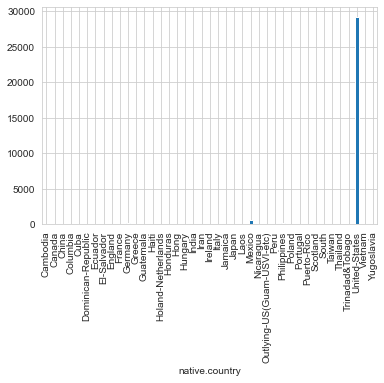

In [48]:
income.groupby('native.country').size().plot(kind = 'bar')

In [52]:
income.groupby(['native.country', 'income']).size() # Statistic showing countries with people earning above 50K or below 50K

native.country  income
Cambodia        <=50K       12
                >50K         7
Canada          <=50K       82
                >50K        39
China           <=50K       55
                          ... 
United-States   >50K      7171
Vietnam         <=50K       62
                >50K         5
Yugoslavia      <=50K       10
                >50K         6
Length: 80, dtype: int64

<AxesSubplot:xlabel='native.country', ylabel='count'>

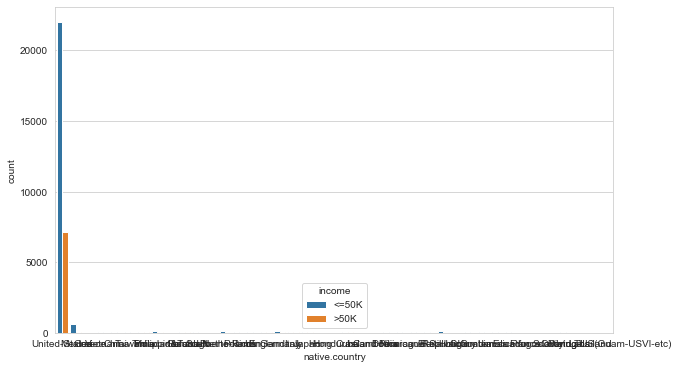

In [55]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'native.country' ,  hue = 'income', data = income)

We observe that few people in the United State earn above 50K.

### 3.3.4) Sex

<AxesSubplot:xlabel='sex'>

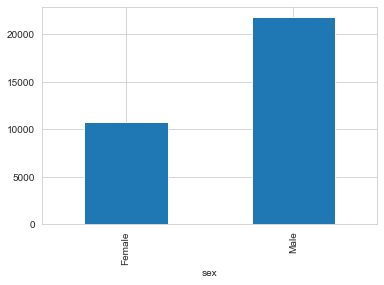

In [56]:
income.groupby('sex').size().plot(kind = 'bar') # Showing the distribution of working women and men

<AxesSubplot:xlabel='sex', ylabel='count'>

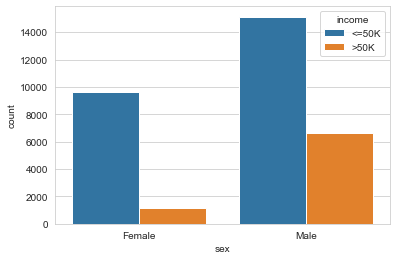

In [57]:
sns.countplot(x = 'sex' ,  hue = 'income', data = income) # Showing which sex earn more in the earning category

In [58]:
income.groupby(['sex', 'income']).size()

sex     income
Female  <=50K      9592
        >50K       1179
Male    <=50K     15128
        >50K       6662
dtype: int64

We observe that male get earning above 50k than women 6: 1.

### 3.3.5) Work Class

<AxesSubplot:xlabel='workclass'>

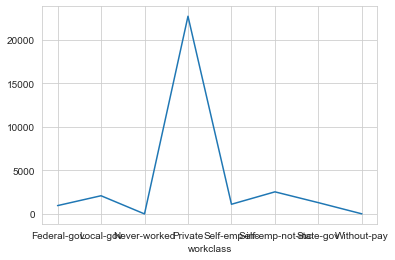

In [59]:
income.groupby('workclass').size().plot()

We notice that the most in demand job lies in the Private sector.

In [60]:
income.groupby(['workclass', 'income']).size()

workclass         income
Federal-gov       <=50K       589
                  >50K        371
Local-gov         <=50K      1476
                  >50K        617
Never-worked      <=50K         7
Private           <=50K     17733
                  >50K       4963
Self-emp-inc      <=50K       494
                  >50K        622
Self-emp-not-inc  <=50K      1817
                  >50K        724
State-gov         <=50K       945
                  >50K        353
Without-pay       <=50K        14
dtype: int64

<AxesSubplot:xlabel='workclass', ylabel='count'>

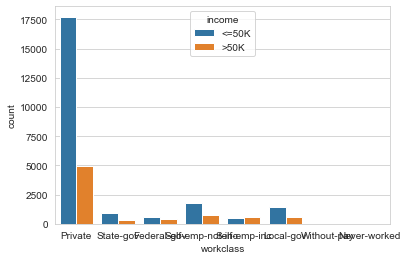

In [61]:
sns.countplot(x = 'workclass' ,  hue = 'income', data = income)

We conclude that people are likely to earn above 50k if they are engage in the Private sector.

### 3.3.6) Education

<AxesSubplot:xlabel='education'>

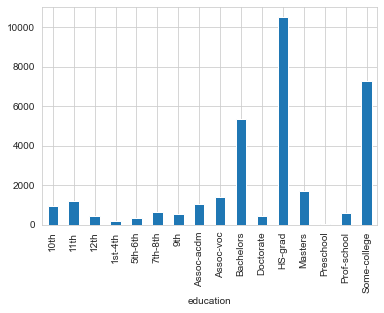

In [63]:
income.groupby('education').size().plot(kind = 'bar') # Showing which educational level get the most jobs

<AxesSubplot:xlabel='education', ylabel='count'>

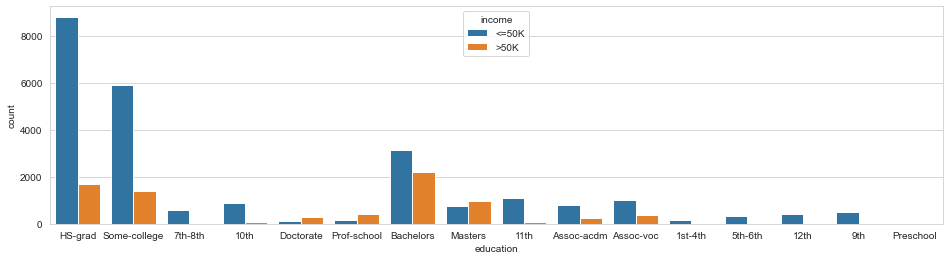

In [65]:
plt.figure(figsize = (16,4))
sns.countplot(x = 'education' ,  hue = 'income', data = income)

In [66]:
income.groupby(['education', 'income']).size()

education     income
10th          <=50K      871
              >50K        62
11th          <=50K     1115
              >50K        60
12th          <=50K      400
              >50K        33
1st-4th       <=50K      162
              >50K         6
5th-6th       <=50K      317
              >50K        16
7th-8th       <=50K      606
              >50K        40
9th           <=50K      487
              >50K        27
Assoc-acdm    <=50K      802
              >50K       265
Assoc-voc     <=50K     1021
              >50K       361
Bachelors     <=50K     3134
              >50K      2221
Doctorate     <=50K      107
              >50K       306
HS-grad       <=50K     8826
              >50K      1675
Masters       <=50K      764
              >50K       959
Preschool     <=50K       51
Prof-school   <=50K      153
              >50K       423
Some-college  <=50K     5904
              >50K      1387
dtype: int64

We conclude that the best earner above 50k should have an educational qualification in either Bachelor degree, HS- graduate certificate, some college certficate, Master or Assoc- Voc certificate.

### 3.3.7) Marital Status

<AxesSubplot:xlabel='marital.status'>

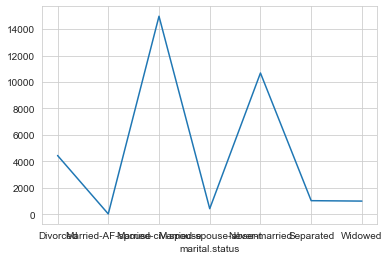

In [67]:
income.groupby('marital.status').size().plot()

<AxesSubplot:xlabel='marital.status', ylabel='count'>

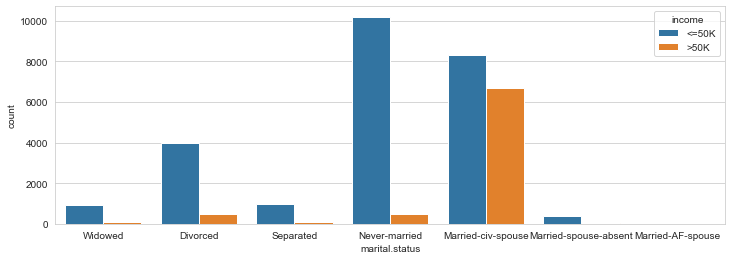

In [68]:
plt.figure(figsize = (12,4))
sns.countplot(x = 'marital.status' ,  hue = 'income', data = income) # Showing the earning against marital status

In [69]:
income.groupby(['marital.status', 'income']).size()

marital.status         income
Divorced               <=50K      3980
                       >50K        463
Married-AF-spouse      <=50K        13
                       >50K         10
Married-civ-spouse     <=50K      8284
                       >50K       6692
Married-spouse-absent  <=50K       384
                       >50K         34
Never-married          <=50K     10192
                       >50K        491
Separated              <=50K       959
                       >50K         66
Widowed                <=50K       908
                       >50K         85
dtype: int64

We conclude that Married-civ-spouse have a greater chance of earning a salary above 50k.

### 3.3.8) Race

<AxesSubplot:xlabel='race'>

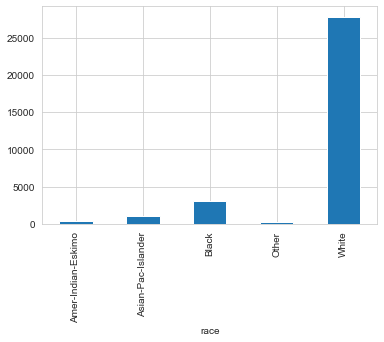

In [70]:
income.groupby('race').size().plot(kind = 'bar') # show the availability of different type of race to work.

<AxesSubplot:xlabel='race', ylabel='count'>

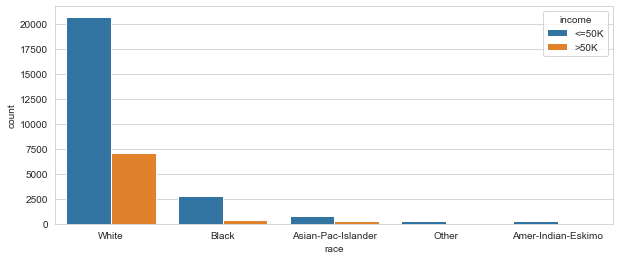

In [71]:
plt.figure(figsize = (10,4))
sns.countplot(x = 'race' ,  hue = 'income', data = income)

In [74]:
income.groupby(['race', 'income']).size()

race                income
Amer-Indian-Eskimo  <=50K       275
                    >50K         36
Asian-Pac-Islander  <=50K       763
                    >50K        276
Black               <=50K      2737
                    >50K        387
Other               <=50K       246
                    >50K         25
White               <=50K     20699
                    >50K       7117
dtype: int64

We conclude that being white play an important role in earning a salary above 50k .